**DEEP LEARNING COURSE PROJECT - IMAGE CLASSIFICATION**

**A GANESH AADHITHYA**

SCDS

email: ganeshaadhithya.a-26@scds.saiuniversity.edu.in

Dataset: Airplanes, Motorbikes & Schooners

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow==2.15

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 71.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 102.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.9 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.0
    Uninstalling wrapt-1.17.0:
      Successfully uninstalled wrapt-1.17.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorboard
    Found existing installatio

In [ ]:
import tensorflow as tf
print(tf.__version__)

from tensorflow import keras
tf.random.set_seed(42)

import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
%matplotlib inline

import glob
import PIL
from PIL import Image

2.15.0


In [ ]:
from numpy import load

X_train_std = load('/content/drive/MyDrive/Models/X_train_std.npy')
X_test_std = load('/content/drive/MyDrive/Models/X_test_std.npy')

y_train = load('/content/drive/MyDrive/Models/y_train.npy')
y_test = load('/content/drive/MyDrive/Models/y_test.npy')

In [ ]:
print("X_train_std_shape: {}".format(X_train_std.shape))
print("X_test_std_shape: {}".format(X_test_std.shape))

X_train_std_shape: (459, 299, 299, 3)
X_test_std_shape: (154, 299, 299, 3)


#Model2_TransferLearning - ResNet101V2




In [ ]:
# Retrieveing the ResNet101V2 model
ResNet101V2=keras.applications.ResNet101V2(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

179518384/179518384 [==============================] - 1s 0us/step


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.905891 to fit



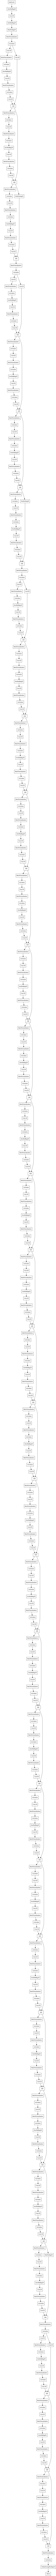

In [ ]:
#Visualizing the Model
tf.keras.utils.plot_model(
    ResNet101V2,
    to_file='ResNet101V2.png',
    show_shapes=False,
    show_layer_names=False,
    rankdir='TB',
    expand_nested=False,
    dpi=96
)

171317808/171317808 [==============================] - 1s 0us/step
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.910802 to fit



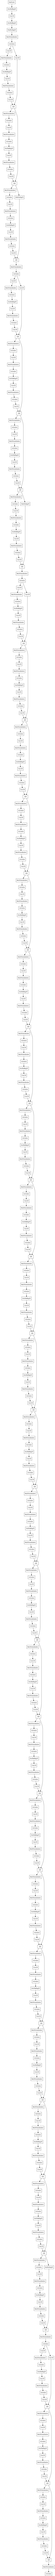

In [ ]:
# Taking only the feature extractor part
base_model2_TL = keras.applications.ResNet101V2(weights='imagenet',
                                                  include_top=False)
# Visualizing the extractor part for transfer learning
tf.keras.utils.plot_model(
    base_model2_TL,
    to_file='baseModel2_TL.png',
    show_shapes=False,
    show_layer_names=False,
    rankdir='TB',
    expand_nested=False,
    dpi=96
)

In [ ]:
# Freezing the weights - will not be updated during backpropagation
for layer in base_model2_TL.layers:
  layer.trainabe = False

In [ ]:
# Adding the classifier part to the model
global_pool = keras.layers.GlobalAveragePooling2D()(base_model2_TL.output)
Layer_Normalization = keras.layers.BatchNormalization()(global_pool)
Drop_out = keras.layers.Dropout(rate=0.35)(Layer_Normalization)
output_ = keras.layers.Dense(units=3, activation='softmax')(Drop_out)

model2_TL = keras.models.Model(inputs=[base_model2_TL.input], outputs=[output_])

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.536786 to fit



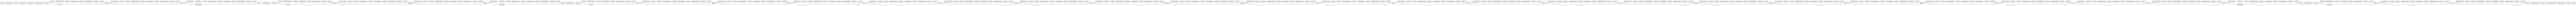

In [ ]:
# Visualizing the complete model
tf.keras.utils.plot_model(
    model2_TL,
    to_file='model2_TL.png',
    show_shapes=False,
    show_layer_names=False,
    rankdir='LR',
    expand_nested=False,
    dpi=96
)

In [ ]:
#Model Summary
model2_TL.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, None, None, 3)        0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, None, None, 64)       9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, None, None, 64)       0         ['conv1_conv[0][0]']          
                                                                                              

In [ ]:
model2_TL.compile(loss='sparse_categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

callbacks_TL = [
             keras.callbacks.ModelCheckpoint("bestTL.h5",
                                             monitor='val_accuracy',
                                             save_weights_only=True,
                                             save_best_only=True)]

history_TL = model2_TL.fit(x = X_train_std, y = y_train, epochs=10,
                          validation_split=0.1, batch_size=16, callbacks=callbacks_TL)

Epoch 1/10
26/26 [==============================] - 89s 940ms/step - loss: 0.3981 - accuracy: 0.8450 - val_loss: 377313.0312 - val_accuracy: 0.4348
Epoch 2/10
26/26 [==============================] - 12s 451ms/step - loss: 0.1943 - accuracy: 0.9443 - val_loss: 12204.0498 - val_accuracy: 0.0870
Epoch 3/10
26/26 [==============================] - 12s 447ms/step - loss: 0.1221 - accuracy: 0.9564 - val_loss: 1739.7562 - val_accuracy: 0.0870
Epoch 4/10
26/26 [==============================] - 12s 483ms/step - loss: 0.1761 - accuracy: 0.9516 - val_loss: 123.1707 - val_accuracy: 0.5217
Epoch 5/10
26/26 [==============================] - 12s 454ms/step - loss: 0.1062 - accuracy: 0.9661 - val_loss: 35.6767 - val_accuracy: 0.0870
Epoch 6/10
26/26 [==============================] - 13s 501ms/step - loss: 0.0360 - accuracy: 0.9879 - val_loss: 10.7873 - val_accuracy: 0.5652
Epoch 7/10
26/26 [==============================] - 13s 507ms/step - loss: 0.1008 - accuracy: 0.9734 - val_loss: 3.9196 - val_

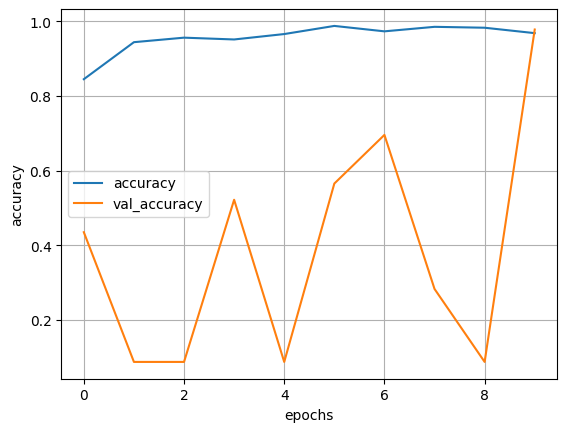

In [ ]:
#Accuracy plot for the model
keys = ['accuracy', 'val_accuracy']
progress = {k:v for k,v in history_TL.history.items() if k in keys}

import pandas as pd
pd.DataFrame(progress).plot()

plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.grid(True)
plt.show()

In [ ]:
testLoss_TL, testAccuracy_TL = model2_TL.evaluate(x = X_test_std, y = y_test)
print("Test-loss: %f, Test-accuracy: %f" % (testLoss_TL, testAccuracy_TL))

5/5 [==============================] - 9s 1s/step - loss: 0.0532 - accuracy: 0.9870
Test-loss: 0.053234, Test-accuracy: 0.987013


In [ ]:
model2_TL.load_weights("bestTL.h5")
testLoss_TL, testAccuracy_TL = model2_TL.evaluate(x = X_test_std, y = y_test)
print("Test-loss: %f, Test-accuracy: %f" % (testLoss_TL, testAccuracy_TL))

5/5 [==============================] - 1s 253ms/step - loss: 0.0532 - accuracy: 0.9870
Test-loss: 0.053234, Test-accuracy: 0.987013


In [ ]:
y_proba = model2_TL.predict(X_test_std)
y_predict = np.argmax(y_proba, axis=-1)
print(y_predict)

5/5 [==============================] - 3s 270ms/step
[2 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 1 1 1
 1 0 1 0 1 2 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 2 0 1 1 0 1 1 1 0 1 0 1 1 1 1
 0 1 0 1 0 0 1 0 1 0 1 2 2 0 1 1 0 0 0 0 1 1 0 1 1 1 1 1 0 2 2 1 1 0 1 0 1
 0 1 0 1 1 0 1 0 2 1 2 0 0 0 0 0 0 0 1 1 1 1 0 2 2 1 0 1 0 2 2 1 2 1 1 0 0
 0 1 2 1 0 0]


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = y_test, y_pred = y_predict)

array([[68,  1,  0],
       [ 0, 69,  0],
       [ 0,  1, 15]])

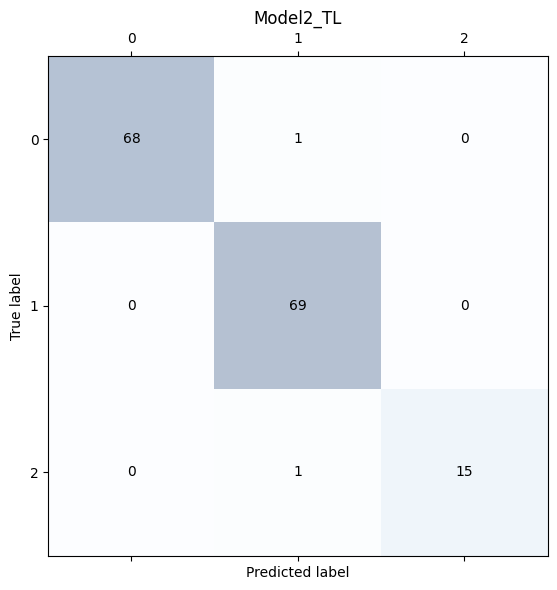

In [ ]:
cm = confusion_matrix(y_true = y_test, y_pred = y_predict)

fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')

ax.title.set_text('Model2_TL')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.savefig("ConfusionMatrix_Model2_TL.png", dpi=300, format='png', pad_inches=0.3)
plt.show()


In [ ]:
#Saving the best model obtained
model2_TL.save('/content/drive/MyDrive/Models/01_ResNet101V2_TransferLearning_Best_Model.h5')
print("Model saved as '01_ResNet101V2_TransferLearning_Best_Model.h5'")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved as '01_ResNet101V2_TransferLearning_Best_Model.h5'
